In [139]:
import numpy as np
import pandas as pd
import os
import math
import pickle

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
## Prep Data

data_all_features = pd.DataFrame()
data_all_labels = pd.DataFrame()

for file in tqdm(os.listdir('/Users/chang/PhD_workplace/MIE1612/project/data/beasley98'+'/train')):
    if not file.startswith('.'):
        file_name = file[:-4]
        feature_path = f'/Users/chang/PhD_workplace/MIE1612/project/data/training/cpfl_cuts_info_{file_name}_features.csv'
        if os.path.exists(feature_path):
            tmp_pd = pd.read_csv(feature_path)
            tmp_label = pd.read_csv(f'/Users/chang/PhD_workplace/MIE1612/project/data/training/cpfl_cuts_info_{file_name}_labels.csv')
            print(file_name, tmp_pd.shape, tmp_label.shape)
            data_all_features = data_all_features.append(tmp_pd)
            data_all_labels = data_all_labels.append(tmp_label)
        else:
            tmp_pd = pd.read_csv(f'/Users/chang/PhD_workplace/MIE1612/project/data/training/cpfl_cuts_info_{file_name}.csv')
            print(file_name, tmp_pd.shape)
            data_all_features = data_all_features.append(tmp_pd.iloc[: , :-2])
            data_all_labels = data_all_labels.append(tmp_pd.iloc[: , -2:])
    print(data_all_features.shape, data_all_labels.shape)
            

  0%|                                                                                                                             | 0/28 [00:00<?, ?it/s]/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_13860/1204990747.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_features = data_all_features.append(tmp_pd)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_13860/1204990747.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_labels = data_all_labels.append(tmp_label)
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_13860/1204990747.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_features = data_all_features.append(tmp_pd)
/var/folders/c_/dv98_90x7fv41pnx2fb

cap132 (3100, 13) (3100, 2)
(3100, 13) (3100, 2)
cap133 (2900, 13) (2900, 2)
(6000, 13) (6000, 2)
cap131 (3300, 13) (3300, 2)
(9300, 13) (9300, 2)
cap124 (1503, 13) (1503, 2)
(10803, 13) (10803, 2)
(10803, 13) (10803, 2)
cap121 (1203, 13) (1203, 2)
(12006, 13) (12006, 2)
cap123 (1504, 13) (1504, 2)
(13510, 13) (13510, 2)
cap64 (2900, 15)
(16410, 13) (16410, 2)
cap72 (5000, 13) (5000, 2)
(21410, 13) (21410, 2)
cap73 (5000, 13) (5000, 2)
(26410, 13) (26410, 2)
cap62 (3500, 13) (3500, 2)
(29910, 13) (29910, 2)
cap74 (5000, 13) (5000, 2)
(34910, 13) (34910, 2)
cap61 (2700, 15)
(37610, 13) (37610, 2)
cap93 (1700, 15)
(39310, 13) (39310, 2)
cap44 (475, 15)
(39785, 13) (39785, 2)
cap51 (1300, 15)
(41085, 13) (41085, 2)
cap92 (1800, 15)
(42885, 13) (42885, 2)
cap84 (3001, 15)


/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_13860/1204990747.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_labels = data_all_labels.append(tmp_pd.iloc[: , -2:])
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_13860/1204990747.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_features = data_all_features.append(tmp_pd.iloc[: , :-2])
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_13860/1204990747.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_all_labels = data_all_labels.append(tmp_pd.iloc[: , -2:])
/var/folders/c_/dv98_90x7fv41pnx2fbrzslh0000gq/T/ipykernel_13860/1204990747.py:19: FutureWarning: The frame.append method is deprecated and will be remov

(45886, 13) (45886, 2)
cap91 (1100, 15)
(46986, 13) (46986, 2)
cap81 (3105, 15)
(50091, 13) (50091, 2)
cap43 (475, 15)
(50566, 13) (50566, 2)
cap82 (2909, 15)
(53475, 13) (53475, 2)
cap41 (383, 15)
(53858, 13) (53858, 2)
cap113 (5000, 13) (5000, 2)
(58858, 13) (58858, 2)
cap112 (5000, 13) (5000, 2)
(63858, 13) (63858, 2)
cap104 (1200, 13) (1200, 2)
(65058, 13) (65058, 2)
cap101 (800, 13) (800, 2)
(65858, 13) (65858, 2)
cap103 (900, 15)
(66758, 13) (66758, 2)


In [4]:
print(data_all_features.shape)
print(data_all_labels.shape)

(66758, 13)
(66758, 2)


In [6]:
# generate labels
data_all_labels['delta_change'] = data_all_labels['MP_obj_after'] - data_all_labels['MP_obj_before']

In [7]:
data_all_labels['pct_change'] = np.where(data_all_labels['MP_obj_after'] == 0, 0, (data_all_labels['MP_obj_after'] - data_all_labels['MP_obj_before'])/data_all_labels['MP_obj_after'])


In [8]:
data_all_labels['label'] = np.where(data_all_labels['pct_change'] > 0.0003, 1, 0)

In [9]:
data_all_labels[data_all_labels['delta_change'] > 0].sample(5)

,MP_obj_before,MP_obj_after,delta_change,pct_change,label
568,6.618569e+07,6.623303e+07,4.734313e+04,7.147963e-04,1
2301,1.052417e+08,1.052417e+08,5.960464e-08,5.663595e-16,0
1047,4.419042e+07,4.439560e+07,2.051831e+05,4.621700e-03,1
870,3.443964e+07,3.483774e+07,3.980948e+05,1.142711e-02,1
178,1.106192e+08,1.120794e+08,1.460192e+06,1.302820e-02,1


In [10]:
data_all_labels[data_all_labels['label'] == 1]['label'].sum()

6685

In [11]:
data_all_labels.shape

(66758, 5)

<AxesSubplot:ylabel='Frequency'>

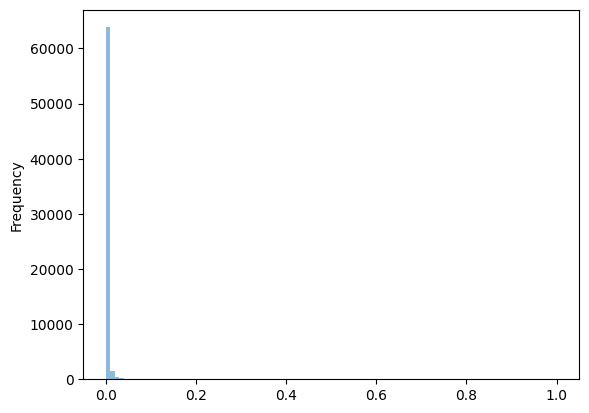

In [12]:
data_all_labels['pct_change'].plot.hist(bins=100, alpha=0.5)

In [13]:
np.percentile(data_all_labels['pct_change'], 90)

0.000306671607203064

In [14]:
data_all_features.sample(5)

,scenario_num,iteration,instance,numCustomer,numLocation,tot_num_scenario,past_num_cut,previous_cut_all_bool,previous_cut_bool,sub_obj_gap,pct_non_zero_in_gamma,master_nsol,sub_optimal_q_value
4805,5.0,48.0,cap72,50.0,16.0,100.0,49.0,1.0,1.0,1.000000,0.1875,0.000000e+00,3.303322e+08
1042,42.0,10.0,cap84,50.0,25.0,100.0,11.0,1.0,1.0,0.027725,0.2400,1.774980e+08,1.825595e+08
1008,8.0,10.0,cap91,50.0,25.0,100.0,11.0,1.0,1.0,0.001300,0.8800,8.783187e+07,8.794618e+07
465,65.0,4.0,cap123,50.0,50.0,100.0,5.0,1.0,1.0,0.326429,0.8600,4.856132e+07,7.209536e+07
2441,41.0,24.0,cap73,50.0,16.0,100.0,25.0,1.0,1.0,1.000000,0.1875,0.000000e+00,3.699013e+08


In [15]:
feature_cols = ['scenario_num', 'iteration', 'numCustomer', 'numLocation', 'tot_num_scenario', 'past_num_cut',
               'previous_cut_all_bool', 'previous_cut_bool', 'sub_obj_gap', 'pct_non_zero_in_gamma']

## Models


In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scikitplot as skplt

In [18]:
## split train and test
X_train, X_test, y_train, y_test = train_test_split(data_all_features[feature_cols], data_all_labels['label'], test_size=0.33, random_state=42)


In [92]:
log_reg_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_proba_log_reg = log_reg_clf.predict_proba(X_test)
threshold = 0.3
y_pred_log_reg = (y_pred_proba_log_reg[:,1] >= threshold).astype(bool)

In [126]:
metrics.roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])

0.933496455315656

/Users/chang/anaconda/envs/python3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

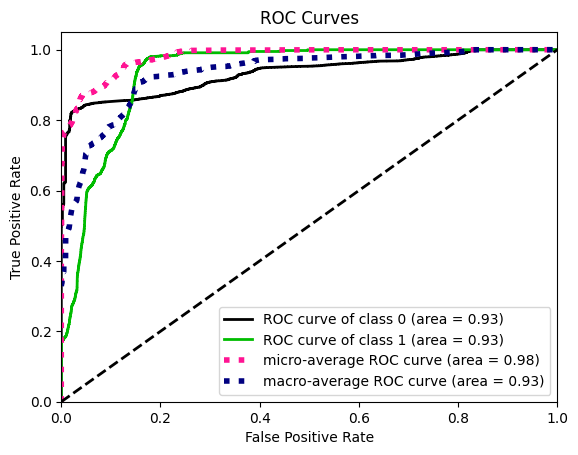

In [127]:
skplt.metrics.plot_roc_curve(y_test, y_pred_proba_log_reg)

In [95]:
metrics.roc_auc_score(y_train, log_reg_clf.predict_proba(X_train)[:, 1])

0.9316451629102623

In [96]:
print(metrics.classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     19839
           1       0.50      0.64      0.56      2192

    accuracy                           0.90     22031
   macro avg       0.73      0.78      0.75     22031
weighted avg       0.91      0.90      0.91     22031



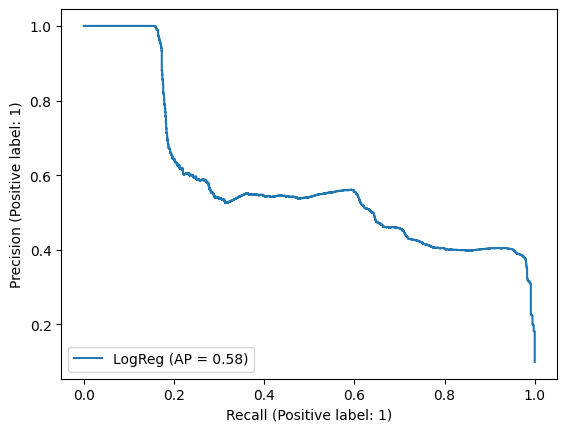

In [98]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_log_reg[:,1], name="LogReg")

In [61]:
from sklearn import svm

In [73]:
svm_clf = svm.SVC(class_weight = 'balanced', verbose = True, random_state = 0, probability=True)
svm_clf.fit(X_train, y_train)

[LibSVM]....................
*.
*..
*
optimization finished, #iter = 23062
obj = -17839.237562, rho = 6.827123
nSV = 18873, nBSV = 18040
Total nSV = 18873
....................
*..
*.
*..
*.
*
optimization finished, #iter = 24664
obj = -17947.591254, rho = 7.196885
nSV = 19035, nBSV = 18155
Total nSV = 19035
....................
*.
*..
*
optimization finished, #iter = 22990
obj = -17822.725250, rho = 6.902650
nSV = 18858, nBSV = 18137
Total nSV = 18858
....................
*.
*..
*
optimization finished, #iter = 22673
obj = -17823.241253, rho = 6.906589
nSV = 18870, nBSV = 18118
Total nSV = 18870
....................
*.
*..
*...
*
optimization finished, #iter = 24750
obj = -17866.793619, rho = 6.802651
nSV = 18906, nBSV = 18035
Total nSV = 18906
Line search fails in two-class probability estimates
..........................
*.
*..
*.
*
optimization finished, #iter = 29312
obj = -22031.918728, rho = -7.334377
nSV = 23419, nBSV = 20962
Total nSV = 23419


SVC(class_weight='balanced', probability=True, random_state=0, verbose=True)

In [74]:
y_pred_proba_svm = svm_clf.predict_proba(X_test)

In [76]:
metrics.roc_auc_score(y_test, y_pred_proba_svm[:, 1])

0.8870223846673753

/Users/chang/anaconda/envs/python3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

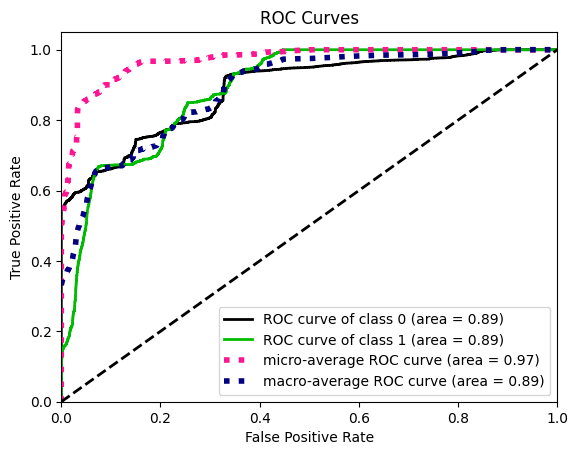

In [128]:
skplt.metrics.plot_roc_curve(y_test, y_pred_proba_svm)

In [89]:
threshold = 0.3
y_pred_svm = (y_pred_proba_svm[:,1] >= threshold).astype(bool)

In [90]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95     19839
           1       0.51      0.66      0.57      2192

    accuracy                           0.90     22031
   macro avg       0.73      0.79      0.76     22031
weighted avg       0.92      0.90      0.91     22031



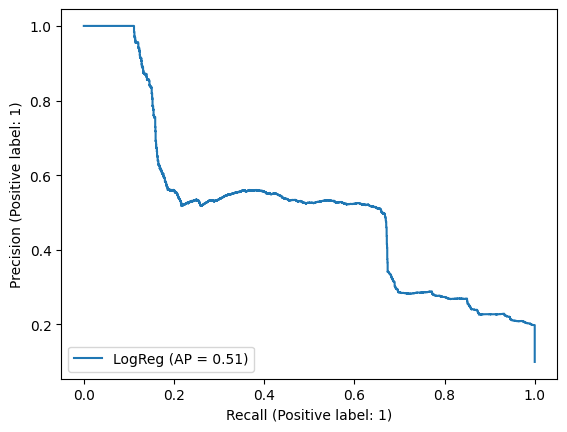

In [82]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_svm[:, 1], name="LogReg")

In [103]:
import xgboost as xgb
from xgboost import XGBClassifier

In [106]:
xgb = XGBClassifier(scale_pos_weight = ((len(y_train) - y_train.sum()) / y_train.sum()))
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [110]:
y_pred_proba_xgb = xgb.predict_proba(X_test)

In [133]:
y_pred_proba_xgb[:,1]

array([2.3866769e-06, 1.3662180e-06, 1.2450668e-06, ..., 7.3253650e-05,
       9.9826932e-01, 1.9124059e-02], dtype=float32)

In [112]:
metrics.roc_auc_score(y_test, y_pred_proba_xgb[:, 1])

0.9980830631841802

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

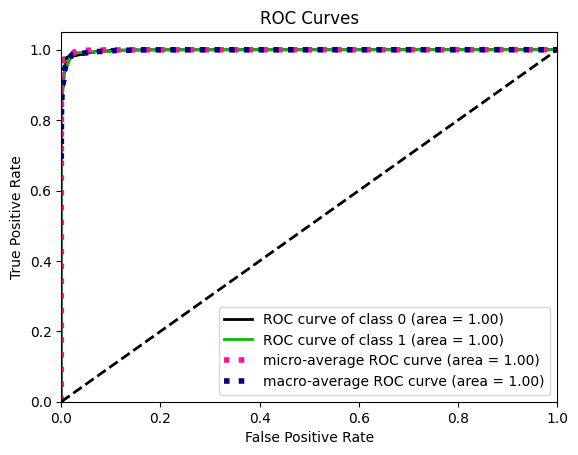

In [124]:
skplt.metrics.plot_roc_curve(y_test, y_pred_proba_xgb)

In [113]:
threshold = 0.3
y_pred_xgb = (y_pred_proba_xgb[:,1] >= threshold).astype(bool)

In [114]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19839
           1       0.84      0.98      0.91      2192

    accuracy                           0.98     22031
   macro avg       0.92      0.98      0.95     22031
weighted avg       0.98      0.98      0.98     22031



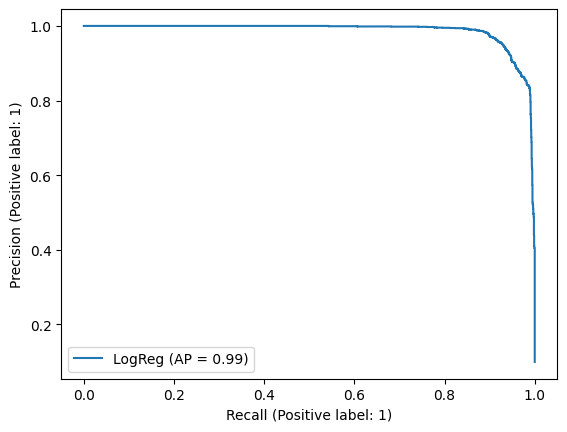

In [115]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba_xgb[:, 1], name="LogReg")

In [129]:
xgb.save_model("xgb_model.json")

In [132]:
pickle.dump(log_reg_clf, open('log_reg_model.pkl', 'wb'))
pickle.dump(svm_clf, open('svm_model.pkl', 'wb'))
pickle.dump(xgb, open('xgb_model.pkl', 'wb'))


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

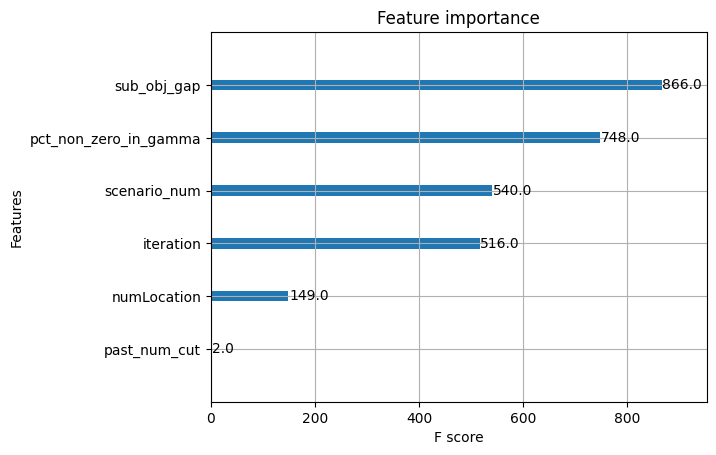

In [142]:
# plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
# plt.show()

from xgboost import plot_importance
plot_importance(xgb)

In [143]:
xgb.feature_importances_

array([0.01793323, 0.539456  , 0.        , 0.15176333, 0.        ,
       0.00770431, 0.        , 0.        , 0.09355447, 0.18958865],
      dtype=float32)

In [137]:
data_all_features.groupby('instance').count().sort_values('scenario_num');

In [151]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


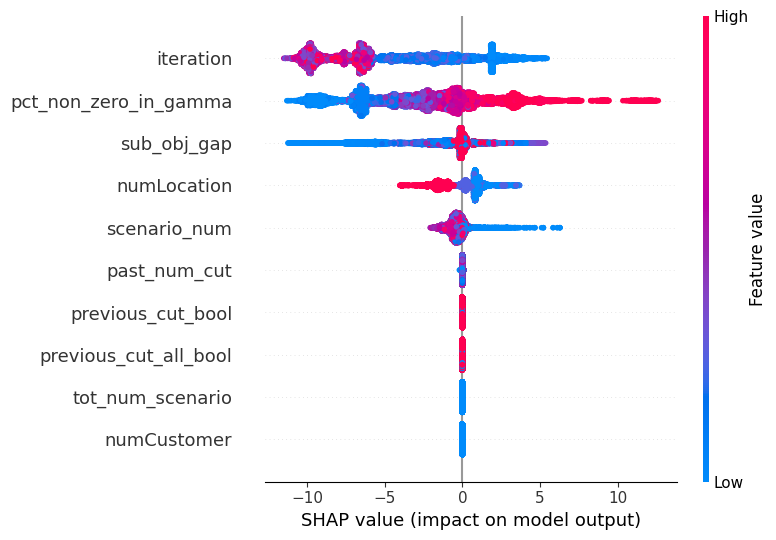

In [152]:
shap.summary_plot(shap_values, X_test)

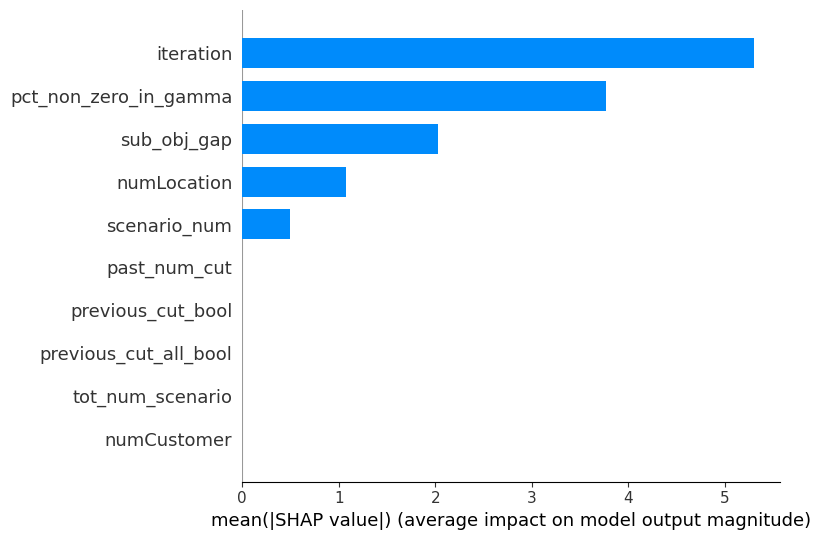

In [153]:
shap.summary_plot(shap_values, X_test, plot_type="bar")